# **Cifar-10 Image Classifiction**

Cifar-10 Image Classifiction
The CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

**Problem Definition**:
Given an image, can we predict the correct class of this image?

The images are very small (32x32) and by visualizing them you will notice how difficult it is to distinguish them even for a human.

In this notebook we are going to build a CNN model that can classify images of various objects. We have 10 class of images:

Airplane
Automobile
Bird
Cat
Deer
Dog
Frog
Horse
Ship
Truck
Evaluation:
We have 10 classes, so if we pick a image and we randomly gues it class, we have 1/10 probability to be true.

# **Loading the Dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
print("X_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("X_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


AxesImage(45,18;279x108.72)


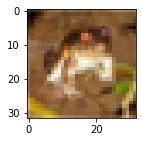

In [4]:
plt.figure(figsize=(5,2))
print(plt.imshow(x_train[0]))

AxesImage(90,18;558x108.72)


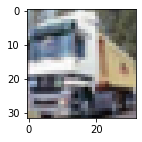

In [5]:
plt.figure(figsize=(10,2))
print(plt.imshow(x_train[1]))

AxesImage(45,18;279x108.72)


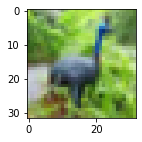

In [6]:
plt.figure(figsize=(5,2))
print(plt.imshow(x_train[6]))

In [7]:
classes=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [8]:
y_train.shape

(50000, 1)

In [9]:
# Converting it to 1- D array

In [10]:
y_train=y_train.reshape(-1,)

In [11]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
def plot_sample(x,y,index):
    plt.figure(figsize=(10,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

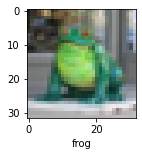

In [13]:
plot_sample(x_train,y_train,19)

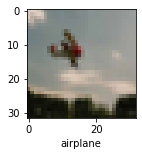

In [14]:
plot_sample(x_train,y_train,42320)

# **Data** **Preprocessing**

In [15]:
# Normalizing the data
x_train=x_train/255
x_test=x_test/255

In [16]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [17]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# **Model Building**
**1. A Artificial Neural Network**

In [18]:
model = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000,activation='relu'),
        layers.Dense(1000,activation='relu'),
        layers.Dense(10,activation='sigmoid')
        ])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 3000)              9219000   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3001000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
model.fit(x_train,y_train,epochs=10)

**2.Using CNN to improve the accuracy** 

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

In [23]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu',padding='same'))
model.add(BatchNormalization())

# Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

# Dropout Layer
model.add(Dropout(0.25))

# Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten Layer
model.add(Flatten())

# Dense Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# Defining the Metrics
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)       

**Using Data Augmentation**

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_cat_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

In [27]:
model_output = model.fit(train_generator, 
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(x_test, y_cat_test)
             )

Epoch 1/50
1562/1562 [==============================] - 29s 19ms/step - loss: 1.6411 - accuracy: 0.4102 - precision: 0.6190 - recall: 0.1962 - val_loss: 1.3938 - val_accuracy: 0.5129 - val_precision: 0.6344 - val_recall: 0.3686
Epoch 2/50
1562/1562 [==============================] - 29s 19ms/step - loss: 1.2334 - accuracy: 0.5653 - precision: 0.7258 - recall: 0.3999 - val_loss: 1.0719 - val_accuracy: 0.6296 - val_precision: 0.7553 - val_recall: 0.5091
Epoch 3/50
1562/1562 [==============================] - 29s 18ms/step - loss: 1.0411 - accuracy: 0.6390 - precision: 0.7721 - recall: 0.5068 - val_loss: 1.0660 - val_accuracy: 0.6608 - val_precision: 0.7547 - val_recall: 0.5659
Epoch 4/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.9382 - accuracy: 0.6772 - precision: 0.7950 - recall: 0.5648 - val_loss: 0.8421 - val_accuracy: 0.7171 - val_precision: 0.8208 - val_recall: 0.6298
Epoch 5/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.8598 - a

**Using history callback to plot Loss, Accuracy, Precision and Recall**

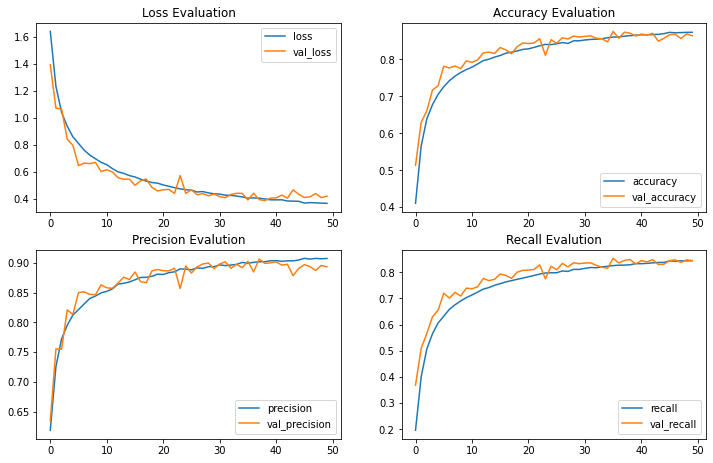

In [29]:
plt.figure(figsize=(12,16))

plt.subplot(4,2,1)
plt.plot(model_output.history['loss'],label="loss")
plt.plot(model_output.history['val_loss'],label="val_loss")
plt.title('Loss Evaluation')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(model_output.history['accuracy'], label='accuracy')
plt.plot(model_output.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Evaluation')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(model_output.history['precision'], label='precision')
plt.plot(model_output.history['val_precision'], label='val_precision')
plt.title('Precision Evalution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(model_output.history['recall'], label='recall')
plt.plot(model_output.history['val_recall'], label='val_recall')
plt.title('Recall Evalution')
plt.legend()

In [36]:
test_accuracy = model.evaluate(x_test,y_cat_test)
print(f'Test Accuracy : {test_accuracy[1] * 100:.2f}%')

313/313 [==============================] - 1s 4ms/step - loss: 0.4195 - accuracy: 0.8643 - precision: 0.8931 - recall: 0.8445
Test Accuracy : 86.43%


# **Confusion Matrix**

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict_classes(x_test)

matrix = confusion_matrix(y_test,y_pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


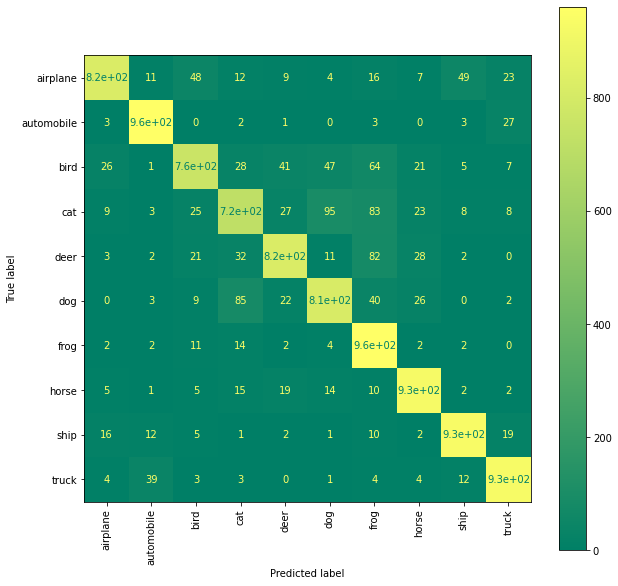

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

output = ConfusionMatrixDisplay(confusion_matrix=matrix,
                                display_labels=classes)

fig, ax = plt.subplots(figsize=(10, 10))
disp = output.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1000
           1       0.93      0.96      0.94      1000
           2       0.86      0.76      0.81      1000
           3       0.79      0.72      0.75      1000
           4       0.87      0.82      0.84      1000
           5       0.82      0.81      0.82      1000
           6       0.75      0.96      0.85      1000
           7       0.89      0.93      0.91      1000
           8       0.92      0.93      0.93      1000
           9       0.91      0.93      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



**Testing the Model**

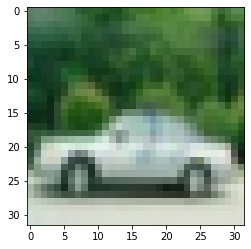

In [48]:
plt.imshow(x_test[330])

In [ ]:
# It's an Automobile.

In [49]:
model.predict_classes(x_test[330].reshape(1, 32, 32, 3))

array([1])

In [ ]:
# Correctly predicted as an automobile.

**Let's view more images in a grid format**

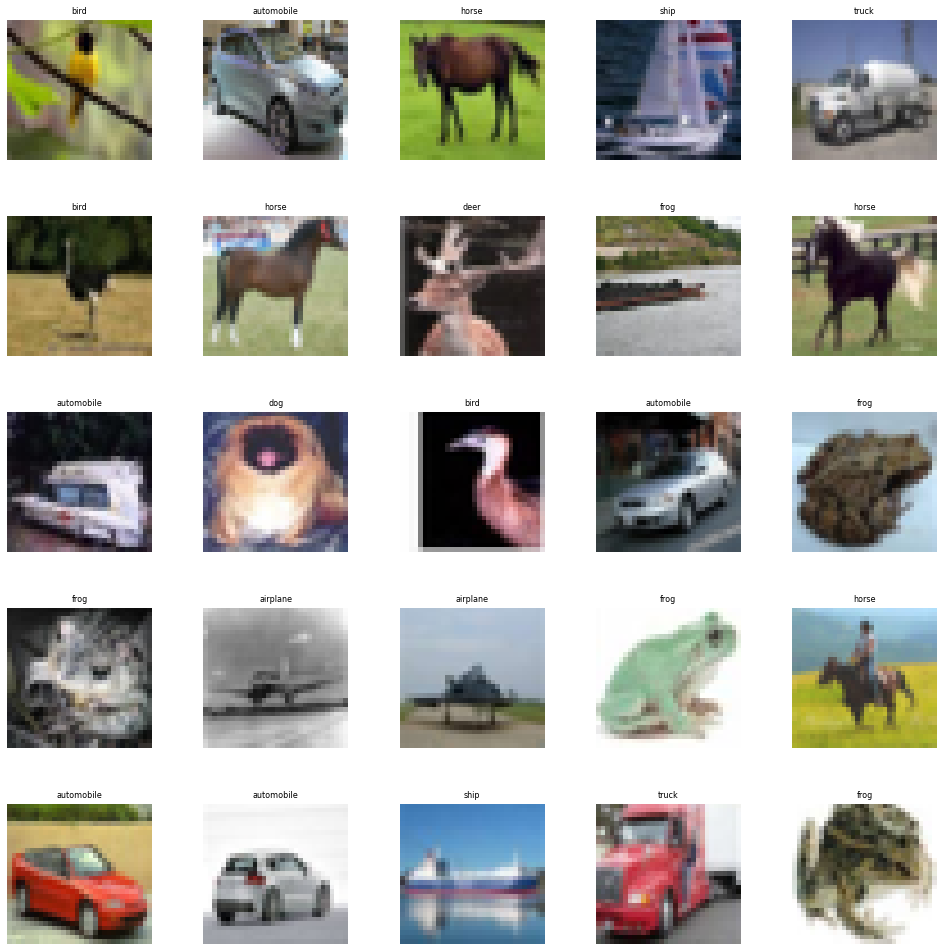

In [53]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']


# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(x_test) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index    
    axes[i].imshow(x_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)